# Changing Working Directory, prepare environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/My Drive'

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

# Import file, checking the raw data file

In [ ]:
xlsx = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
cus_transaction=pd.read_excel(xlsx, 'Transactions',header = 1)
cus_list = pd.read_excel(xlsx, 'NewCustomerList',header = 1)
cus_demographic= pd.read_excel(xlsx, 'CustomerDemographic',header = 1)
cus_address = pd. read_excel(xlsx,'CustomerAddress',header = 1)

In [ ]:
cus_demographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
cus_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
cus_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000




*    There is no column about age so we have to create one base on the column about DOB
*    JOB title + Job Industry columns have a lot NA value (about 600-700 observations) => I will try to merge 2 columns to reduce the amount of drop observation that is NA



In [ ]:
Data_source = cus_demographic #ít khi động vào data gốc, tránh lỗi,...

In [ ]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) #nếu vượt qua ngày sinh nhật sẽ được tính tuổi
  
    return age 
Data_source['age'] = Data_source['DOB'].apply(calculateAge)

In [ ]:
for i in range(len(Data_source)):
  if pd.isna(Data_source.job_title[i]) == True : Data_source.job_title[i] = Data_source.job_industry_category[i]

Data_source

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,40.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,67.0
3,4,Talbot,NaN,Male,33,1961-10-03,IT,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,45.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,19.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,Manufacturing,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,47.0


In [ ]:
Data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3895 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     




*   Sau khi fill được 1 ít, ta thấy có 1 cột default rất lạ => có thể drop. After clean abit, we can see. The value in the default column is quite weird => I should drop it
*    The column about customer's name can be dropoed because we still have the customer_id column, so we can track their name after our test
*   After all, we can drop all the nan value, let see what we will have.







In [ ]:
Data_source = Data_source.drop(['first_name','last_name','DOB','job_industry_category','default'], axis = 1)
Data_source = Data_source.dropna()
Data_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3808 non-null   int64  
 1   gender                               3808 non-null   object 
 2   past_3_years_bike_related_purchases  3808 non-null   int64  
 3   job_title                            3808 non-null   object 
 4   wealth_segment                       3808 non-null   object 
 5   deceased_indicator                   3808 non-null   object 
 6   owns_car                             3808 non-null   object 
 7   tenure                               3808 non-null   float64
 8   age                                  3808 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 297.5+ KB


In [ ]:
def conv_gender (x):
  if x == 'Male':
    return 'M'
  elif x== 'Female':
    return 'F'
  elif x == 'Femal':
    return 'F'
  else: return x

Data_source.gender = Data_source.gender.apply(conv_gender) #thống nhất input các gender
Data_source.reset_index(drop=True, inplace=True) #reset index sau khi đã drop các thứ :))
Data_source

,customer_id,gender,past_3_years_bike_related_purchases,job_title,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,F,93,Executive Secretary,Mass Customer,N,Yes,11.0,67.0
1,2,M,81,Administrative Officer,Mass Customer,N,Yes,16.0,40.0
2,3,M,61,Recruiting Manager,Mass Customer,N,Yes,15.0,67.0
3,4,M,33,IT,Mass Customer,N,No,7.0,59.0
4,5,F,56,Senior Editor,Affluent Customer,N,Yes,8.0,43.0
...,...,...,...,...,...,...,...,...,...
3803,3995,M,93,Staff Scientist,Mass Customer,N,Yes,14.0,45.0
3804,3996,F,8,VP Product Management,Mass Customer,N,No,19.0,45.0
3805,3997,F,87,Statistician II,High Net Worth,N,Yes,1.0,19.0
3806,3999,M,11,Manufacturing,Affluent Customer,N,Yes,10.0,47.0


# Clean Transation file => apply RFM model

Compute Money, Recency and Frequence

In [ ]:
cus_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
cus_transaction['Money'] = cus_transaction['list_price'] - cus_transaction['standard_cost'] #assumption: profit = list_price - standard_cost
cus_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Money
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [ ]:
cus_transaction['transaction_date'].max() #define the time of computing is latest date of transaction in the data source (max of transaction_date)

Timestamp('2017-12-30 00:00:00')

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt
#Set Latest date 2017-12-31 as last invoice date was 2017-12-30. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2017,12,31)

#Create RFM Modelling scores for each customer
RFMScores = cus_transaction.groupby('customer_id', as_index=False).agg({'transaction_date' : [lambda x: (Latest_Date - x.max()).days], 'transaction_id' : [lambda x: len(x)], 'Money' : [lambda x: x.sum()]})

#Convert Invoice Date into type int
RFMScores['transaction_date'] = RFMScores['transaction_date'].astype(int)
#Rename column names to Recency, Frequency and Monetary

RFMScores.rename(columns={'transaction_date': 'Recency', 
                         'transaction_id': 'Frequency', 
                         'Money': 'Monetary'}, inplace=True)

RFMScores.columns = list(map(''.join, RFMScores.columns.values)) #avoid multiindex

RFMScores.rename(columns={'Recency<lambda>': 'Recency', 
                         'Frequency<lambda>': 'Frequency', 
                         'Monetary<lambda>': 'Monetary'}, inplace=True) #rename again

RFMScores

,customer_id,Recency,Frequency,Monetary
0,1,8,11,3018.090000
1,2,129,3,2226.260000
2,3,103,8,3362.810000
3,4,196,2,220.570000
4,5,17,6,2394.940000
...,...,...,...,...
3489,3497,53,3,1648.320000
3490,3498,128,6,3147.330000
3491,3499,52,7,4955.250000
3492,3500,145,6,1785.860000


From the RFM model => we can divide our customer into several small groups. So, we can the a look at the group that is the most valuable to our company. That group should spend a lot of Money, Visit our store many times, and so on.

# Use K-means cluster to divide our customers

In [ ]:
# import the necessary library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( RFMScores )

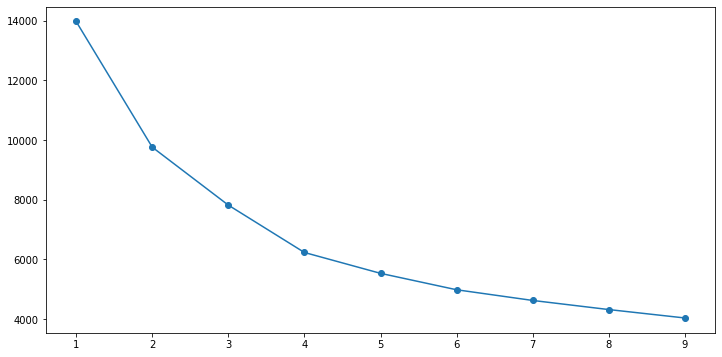

In [ ]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Nomarlly, we should chose the numer of groups is 4 (the number of group is as small as possible and we do not lose much information). However, there is only nearly 4000 observations, => there will be nearly 1000 observations per group, => it might be insufficient for performancing other tests (such as Logistics regression or Neural Network). => In this case, I think I will chose the number of groups is 2.

In [ ]:
clusters = KMeans(2)  # 2 clusters
clusters.fit( X_scaled )
RFMScores["cluster_label"] = clusters.labels_
RFMScores.groupby('cluster_label').mean()

,customer_id,Recency,Frequency,Monetary
cluster_label,,,,
0,1679.428044,36.936654,7.558426,4468.338573
1,1813.030514,83.467880,4.127409,1961.865870


=> we will focus on the customers that on the 2nd group because they, on average, spend more money, more frequent and recent than the other group. => a logistics regression can be employed to address which variables (on the demographics table) affect the most their behaviour which follows the RFM model is the more valuable customer to the company than other.

In [ ]:
RFMScores['customer_id'] = RFMScores.index.get_level_values(0)
RFMScores

,customer_id,Recency,Frequency,Monetary,cluster_label
0,0,8,11,3018.090000,0
1,1,129,3,2226.260000,1
2,2,103,8,3362.810000,0
3,3,196,2,220.570000,1
4,4,17,6,2394.940000,0
...,...,...,...,...,...
3489,3489,53,3,1648.320000,1
3490,3490,128,6,3147.330000,1
3491,3491,52,7,4955.250000,0
3492,3492,145,6,1785.860000,1


In [ ]:
#insert the cluster_label column to the demographic table follow the customer_id
Data = pd.merge(RFMScores[['customer_id','cluster_label']],Data_source, on='customer_id')
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3328
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3329 non-null   int64  
 1   cluster_label                        3329 non-null   int32  
 2   gender                               3329 non-null   object 
 3   past_3_years_bike_related_purchases  3329 non-null   int64  
 4   job_title                            3329 non-null   object 
 5   wealth_segment                       3329 non-null   object 
 6   deceased_indicator                   3329 non-null   object 
 7   owns_car                             3329 non-null   object 
 8   tenure                               3329 non-null   float64
 9   age                                  3329 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 273.1+ KB


Now, I'll export the data file, and performance the Logistics regression by R studio. Because I'm more familliar with the R studio than R-family Library in Python. And furthermore, the number of observations is quite small, so it can be easily performed in R-studio

In [ ]:
Data.to_csv('KPMG_data_final.csv')